In [1]:
import os
import pynwb
import numpy as np
import datajoint as dj
import matplotlib.pyplot as plt

import spyglass.common as sgc
import spyglass.position.v1 as sgp
import spyglass.position_linearization.v1 as sgpl

# ignore datajoint+jupyter async warnings
import warnings

warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", category=ResourceWarning)

[2023-12-14 08:16:29,308][INFO]: Connecting sambray@lmf-db.cin.ucsf.edu:3306
[2023-12-14 08:16:29,356][INFO]: Connected sambray@lmf-db.cin.ucsf.edu:3306


## Make the Track graphs

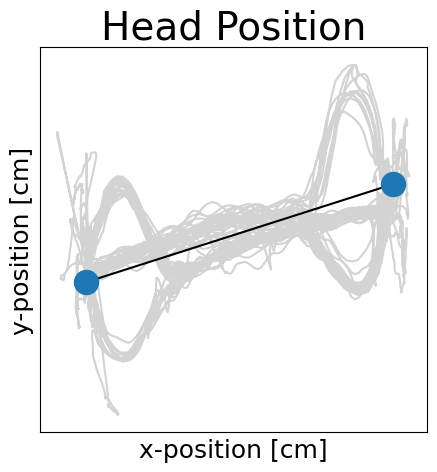

In [26]:
from spyglass.position import PositionOutput
import pandas as pd

nwb_file_name = "Winnie20220713_.nwb"
nwb_file_name = 'Banner20211231_.nwb'
nwb_file_name = "Yoshi20220513_.nwb"
nwb_file_naem = "Frodo20230811_.nwb"

animal = (sgc.Session() & {"nwb_file_name": nwb_file_name}).fetch1("subject_id")
animal = 'Winnie'
track_graph_name = f'ms_lineartrack'


# define keys
pos_key = {
    "nwb_file_name": nwb_file_name,
    "interval_list_name": "pos 1 valid times",
    "position_info_param_name": "default",
}

track_key = {
    "track_graph_name": track_graph_name,
}

# get position info
merge_id = (PositionOutput.TrodesPosV1() & pos_key).fetch1("merge_id")
position_info = (PositionOutput & {"merge_id": merge_id}).fetch1_dataframe()
position_info

#plot position info
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(
    position_info.position_x,
    position_info.position_y,
    color="lightgrey",
    zorder=-1
)
ax.set_xlabel("x-position [cm]", fontsize=18)
ax.set_ylabel("y-position [cm]", fontsize=18)
ax.set_title("Head Position", fontsize=28)

if sgpl.TrackGraph() & track_key:
    graph = (sgpl.TrackGraph() & track_key)
    graph.plot_track_graph(ax=ax)
    
else:
    print("No track graph found")
    print("Please define a graph in the cell below and re-run this cell")


In [25]:
track_key = (sgpl.TrackGraph() & track_key).fetch(as_dict=True)[0]
track_key['track_graph_name'] = "ms_lineartrack"
sgpl.TrackGraph().insert1(track_key)

## Populate the Selection keys

In [33]:
merge_id_list = (PositionOutput.TrodesPosV1() & f"nwb_file_name LIKE '{animal}%'").fetch('merge_id')
# merge_id_list

array([UUID('3340551d-f2cb-93c7-2776-78141cf3cf2f'),
       UUID('db24b81f-6501-c2db-5de9-64f00c625ef2'),
       UUID('ea4aca8c-cbe1-92a2-018b-43887cd88b06'),
       UUID('5a1225c9-663b-8577-0b75-d1eea74e121a'),
       UUID('614b18e1-f667-1e03-5519-01e16a0e3ccd'),
       UUID('1b78bc5e-4e06-54a8-062e-1f92d354b289'),
       UUID('9ae01055-8426-367b-542a-60195ca0456b'),
       UUID('18564c13-f4c3-8af0-5fcc-319d8a18ead0'),
       UUID('b0f6b3ae-d677-6f10-ccc2-a148e88384af'),
       UUID('14f94b65-6231-f95f-3ca8-e247d47a5472'),
       UUID('d176ed57-fdce-204f-3ef9-17eedc1a85b5'),
       UUID('cd8b1b4a-ff39-e34c-f474-6760dca91204'),
       UUID('8f165ad9-458a-b208-3680-4f646eba5309'),
       UUID('c3c65c41-f12e-86e7-f5ff-2a8c1f9fccf9'),
       UUID('bf0d72c2-ab36-9a5f-ef9f-add8d3c2163e'),
       UUID('f84e3ce5-45d7-eb0d-3b60-df4f94884fcf'),
       UUID('c45f28f6-6a89-524e-2e67-73bedd238ab2'),
       UUID('64e56fd5-1a1a-dda1-e73a-c896c84d55bd'),
       UUID('76811622-c020-6d77-af2e-8c002fb29

In [34]:
for animal in ['Winnie','Wallie','Yoshi','Frodo','Banner', 'Odins','Dan',
               'Totoro','Olive']:
    merge_id_list = (PositionOutput.TrodesPosV1() & f"nwb_file_name LIKE '{animal}%'").fetch('merge_id')
    for merge_id in merge_id_list:
        sgpl.LinearizationSelection.insert1(
            {
                "pos_merge_id": merge_id,
                "track_graph_name": "ms_lineartrack",
                "linearization_param_name": "default",
            },
            skip_duplicates=True,
        )

sgpl.LinearizationSelection()

pos_merge_id,track_graph_name,linearization_param_name name for this set of parameters
af2e637c-47d9-8e27-11f1-3ac12431f417,6 arm,default
001b5af0-489e-5437-9e34-f2130727ebc5,ms_lineartrack,default
00551a35-a28e-c884-0c33-8f3817cf59c2,ms_lineartrack,default
00afca31-a7b3-7d44-4752-531de37263a3,ms_lineartrack,default
00c9698e-146e-3bdc-61e4-c19ad4c8840d,ms_lineartrack,default
022c034d-da79-ca8c-a758-6c2e78b65fcf,ms_lineartrack,default
02e45fe1-a55d-124a-18b2-88ea2a811ee1,ms_lineartrack,default
034625b0-b78d-5dba-3c14-1ac04ee20f0e,ms_lineartrack,default
0355560d-43fa-0200-88d3-708b7f425ef7,ms_lineartrack,default
035b1148-b4c9-7c1b-36a0-4ccdd4d280fa,ms_lineartrack,default


## Populate the LinearizationV1 table

In [35]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)
sgpl.LinearizedPositionV1().populate(processes=16)

Computing linear position for: {'pos_merge_id': UUID('001b5af0-489e-5437-9e34-f2130727ebc5'), 'track_graph_name': 'ms_lineartrack', 'linearization_param_name': 'default'}Computing linear position for: {'pos_merge_id': UUID('00c9698e-146e-3bdc-61e4-c19ad4c8840d'), 'track_graph_name': 'ms_lineartrack', 'linearization_param_name': 'default'}Computing linear position for: {'pos_merge_id': UUID('00551a35-a28e-c884-0c33-8f3817cf59c2'), 'track_graph_name': 'ms_lineartrack', 'linearization_param_name': 'default'}Computing linear position for: {'pos_merge_id': UUID('00afca31-a7b3-7d44-4752-531de37263a3'), 'track_graph_name': 'ms_lineartrack', 'linearization_param_name': 'default'}
Computing linear position for: {'pos_merge_id': UUID('034625b0-b78d-5dba-3c14-1ac04ee20f0e'), 'track_graph_name': 'ms_lineartrack', 'linearization_param_name': 'default'}

Computing linear position for: {'pos_merge_id': UUID('035b1148-b4c9-7c1b-36a0-4ccdd4d280fa'), 'track_graph_name': 'ms_lineartrack', 'linearization_

In [36]:
sgpl.LinearizedPositionV1()

pos_merge_id,track_graph_name,linearization_param_name name for this set of parameters,analysis_file_name name of the file,linearized_position_object_id
001b5af0-489e-5437-9e34-f2130727ebc5,ms_lineartrack,default,Winnie20220714_8FOZKCPEXW.nwb,9b7b03d8-1df8-4a04-9566-ada9ad7d935e
00551a35-a28e-c884-0c33-8f3817cf59c2,ms_lineartrack,default,Olive20220707_FIDPJQ458I.nwb,71ab61e9-cf9b-436c-b489-9f09b6f989da
00afca31-a7b3-7d44-4752-531de37263a3,ms_lineartrack,default,Wallie20220922_EP1QE0SBJR.nwb,b2797c39-606f-43cb-8d8f-652870b9db67
00c9698e-146e-3bdc-61e4-c19ad4c8840d,ms_lineartrack,default,Olive20220708_XXXT7RYLRX.nwb,8bbd3fb5-6cab-491a-8d74-c06818678248
022c034d-da79-ca8c-a758-6c2e78b65fcf,ms_lineartrack,default,Winnie20220720_F3YE2F28QX.nwb,2fc84409-b55f-44b0-9d72-740fdf5269c4
02e45fe1-a55d-124a-18b2-88ea2a811ee1,ms_lineartrack,default,Yoshi20220513_P0CS8SDDGH.nwb,129f54bc-f0f0-4136-af48-7e20923656f7
034625b0-b78d-5dba-3c14-1ac04ee20f0e,ms_lineartrack,default,Frodo20230814_D1UOVKS0P2.nwb,eb948bb1-c216-478c-9e8b-858c0a635fbc
0355560d-43fa-0200-88d3-708b7f425ef7,ms_lineartrack,default,Winnie20220716_P9SJOB4S8U.nwb,0cfda902-8b81-4eed-9604-087f6b4eaa27
035b1148-b4c9-7c1b-36a0-4ccdd4d280fa,ms_lineartrack,default,Frodo20230810_KUUGULBI4M.nwb,3fcca6ed-304f-437c-a786-7dc029bedccd
03eb609d-75bb-1122-74a2-70cda8e12cdd,ms_lineartrack,default,Frodo20230816_9DQBEDMT7P.nwb,743693b1-d077-4667-a81f-27b7de61db01
